In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.feature import hog
from skimage import io

from data_utils import load_CIFAR10_raw
from softmax_without_regression import Softmax


def pre_dataset():
    cifar10_dir = 'D:/dataset/cifar-10-python/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10_raw(cifar10_dir)
    train_num = 10000
    test_num = 2000
    X_train = X_train[0:train_num]
    y_train = y_train[0:train_num]
    X_test = X_test[0:test_num]
    y_test = y_test[0:test_num]
    # 提取hog特征
    X_train_hog = []
    for i in range(X_train.shape[0]):
        curr_features = hog(X_train[i], orientations=9, 
                            pixels_per_cell=(4, 4),cells_per_block=(2, 2), visualize=False)
        X_train_hog.append(curr_features)
        if(i % 100 == 0):
            print('hog processing train_data %d' % i)
    X_train_hog = np.array(X_train_hog)

    X_test_hog = []
    for i in range(X_test.shape[0]):
        curr_features = hog(X_test[i], orientations=9, pixels_per_cell=(4, 4),
                            cells_per_block=(2, 2), visualize=False)
        X_test_hog.append(curr_features)
        if(i % 100 == 0):
            print('hog processing test data %d' % i)
    X_test_hog = np.array(X_test_hog)

    # add a parameter for W
    X_train = np.hstack([X_train_hog, np.ones((X_train.shape[0], 1))])
    X_test = np.hstack([X_test_hog, np.ones((X_test.shape[0], 1))])

    return X_train, y_train, X_test, y_test


def get_softmax_model(X, y, learning_rate, batch_num, num_iter):
    softmax = Softmax()
    loss_history = softmax.train(X, y, learning_rate, batch_num, num_iter)
    VisualizeLoss(loss_history)
    return softmax


def VisualizeLoss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()


def pca_dim_reduction(X_train,X_test): #降维
    pca = PCA(n_components=128)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    X_test_transformed = pca.transform(X_test)
    return X_train_transformed,X_test_transformed

In [2]:
X_train, y_train, X_test, y_test = pre_dataset()

D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_1
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_2
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_3
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_4
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_5
D:/dataset/cifar-10-python/cifar-10-batches-py\test_batch
hog processing train_data 0
hog processing train_data 100
hog processing train_data 200
hog processing train_data 300
hog processing train_data 400
hog processing train_data 500
hog processing train_data 600
hog processing train_data 700
hog processing train_data 800
hog processing train_data 900
hog processing train_data 1000
hog processing train_data 1100
hog processing train_data 1200
hog processing train_data 1300
hog processing train_data 1400
hog processing train_data 1500
hog processing train_data 1600
hog processing train_data 1700
hog processing train_data 1800
hog processing train_data 1900
hog processing train_data 2000
hog

In [3]:
#pca降维
X_train,X_test = pca_dim_reduction(X_train,X_test)
print("reduction",X_train.shape)

reduction (10000, 128)


Iteration 0 / 20000, learning rate 0.010000 : loss 2.302764
Iteration 500 / 20000, learning rate 0.010000 : loss 2.132352
Iteration 1000 / 20000, learning rate 0.005000 : loss 2.104990
Iteration 1500 / 20000, learning rate 0.005000 : loss 2.075710
Iteration 2000 / 20000, learning rate 0.002500 : loss 2.082493
Iteration 2500 / 20000, learning rate 0.002500 : loss 2.065065
Iteration 3000 / 20000, learning rate 0.001250 : loss 2.090003
Iteration 3500 / 20000, learning rate 0.001250 : loss 2.076661
Iteration 4000 / 20000, learning rate 0.000625 : loss 2.086970
Iteration 4500 / 20000, learning rate 0.000625 : loss 2.091046
Iteration 5000 / 20000, learning rate 0.000313 : loss 2.096263
Iteration 5500 / 20000, learning rate 0.000313 : loss 2.090950
Iteration 6000 / 20000, learning rate 0.000156 : loss 2.089371
Iteration 6500 / 20000, learning rate 0.000156 : loss 2.068150
Iteration 7000 / 20000, learning rate 0.000078 : loss 2.095073
Iteration 7500 / 20000, learning rate 0.000078 : loss 2.103

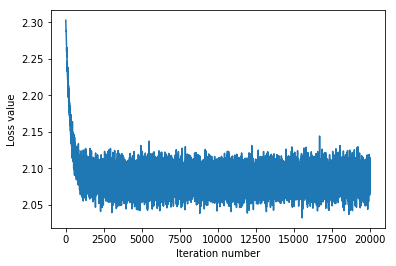

learning_rate: 0.001000;batch_num: 500; Accuracy: 0.427500


In [4]:
batch_nums = [500]
learning_rates = [0.001]
num_iter = 20000
for learning_rate in learning_rates:
    for batch_num in batch_nums:
        softmax = get_softmax_model(
            X_train, y_train, learning_rate, batch_num, num_iter)
        y_pred = softmax.predict(X_test)
        acc = np.mean(y_pred == y_test)
        print('learning_rate: %f;batch_num: %d; Accuracy: %f' %
              (learning_rate, batch_num, acc))